## Goal: Build a deep learning neural network to classify of clothing (wether the given image/value belongs to T-shirts/Tops, Sandlas/ Ankle Boots)

### To do this, we use dataset Fashion MNIST (contains 28x28 pixel images of different clothing)

In [3]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
print(tf.VERSION)

1.12.0


In [4]:
#keras function to call our dataset
fashion_mnist = keras.datasets.fashion_mnist
#this will give us 2 lists 
#(1 is imaes of labels will use to train the model & other list is used to test/accurate our final model)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 13s 3us/step


### Loading the dataset returns four NumPy arrays:
### The train_images and train_labels arrays are the training set —the data the model uses to learn.
### The model is tested against the test set, the test_images, and test_labels arrays.

### Fashion MNIST has 10 classes of different clothing, we can see all their numbers are mapping to class
### Label 0 belongs to T-shirts/Tops, Label 5 - Sandals, Label 9 - Ankle boot

### Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the Dataset

### Let's explore the format of the dataset before training the model.

In [12]:
train_images.shape

(60000, 28, 28)

### as we seen above, it has 60000 images in our training set and each 28x28 pixels

In [15]:
len(train_labels)

60000

### as we see we have the same number of labels

In [16]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### each number in our train labels are in between 0 and 9

In [17]:
test_images.shape

(10000, 28, 28)

### we have 10000 images in our test set and each is 28x28 pixels

In [19]:
len(test_labels)

10000

### our testset contains 10000 image labels

## Preprocessing Data

### The data must be preprocessed before training the network.


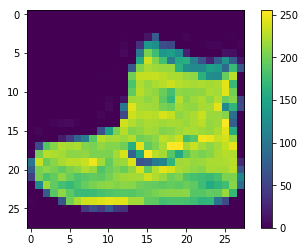

In [25]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

### If you see the first image in the training set, you will see that the pixel values fall in the range of 0 to 255

## Normalization

### Let's scale these values instead of having the integer value in between 0 to 255, we will have a float value between 0 and 1

In [26]:
train_images = train_images/255.0
test_images = test_images/255.0

### Let's display the first 25 images from our trainign set and corresponding names for each. Verify that the data is in the correct format and we're ready to build and train the network.

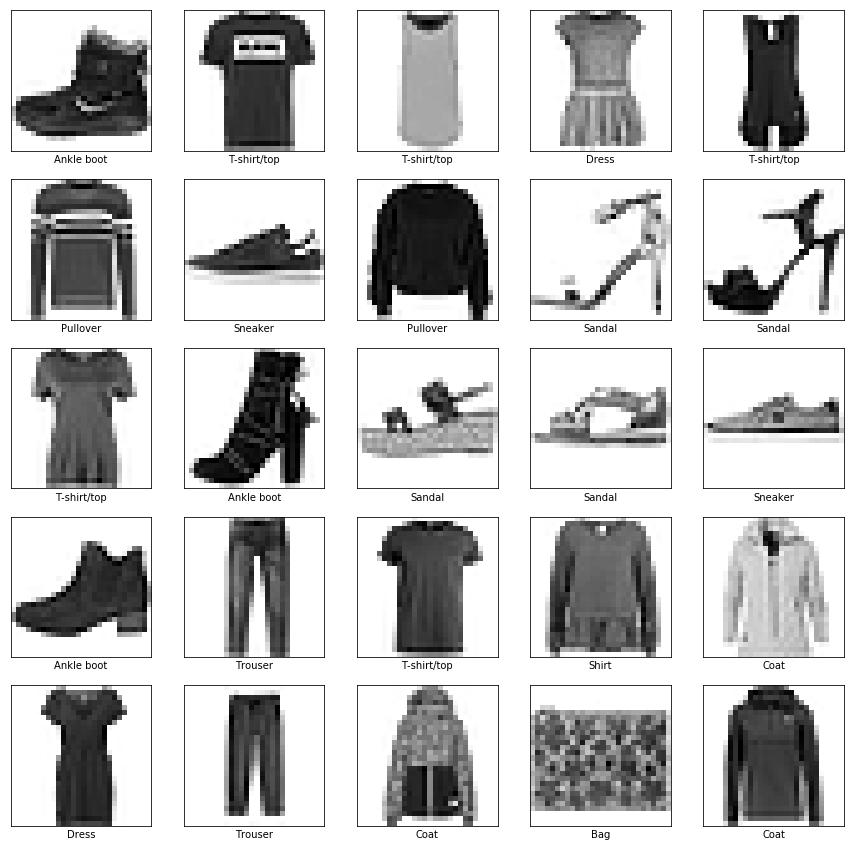

In [34]:
plt.figure(figsize = (15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build Model

### Build a neural network which is going to be a sequential model
### this means the layers will be processed in the order declared here
### Building the neural network requires configuring the layers of the model, then compiling the model.

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),#we declared our 1st layer to be flatten type, followed by 2 Dense layers
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])
#we applied non linear function relu to calculate our 10 output classes
#using softmax to create the probability distribution that sums to 1

## Compile the Model

### the only thing remaining is to specify the optimiser, loss function and that would like to see the accuracy metrix during evaluation

## Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
## Optimizer —This is how the model is updated based on the data it sees and its loss function.
## Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [38]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


### Let's Train our model

### Steps: 
### Feed the training data to our model—in this example, the train_images and train_labels arrays.
### The model learns to associate images and labels.
### We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

In [39]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.4928 - acc: 0.8266
Epoch 2/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.3706 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3312 - acc: 0.8801
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3074 - acc: 0.8863
Epoch 5/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.2915 - acc: 0.8923


### 1 epoch is full iteration of our training dataset

### As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

### Evaluate Accuracy

### Now, compare how our model performs on the test dataset

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy :", test_acc)

10000/10000 [==============================] - 0s 31us/step
Test Accuracy : 0.8731


### Pretty good results
### the accuracy on the test dataset is a very little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data (test set) than on their training data.

## Make Predictions

### as we trained our model, we can use it to make predictions on some images 

In [43]:
predictions = model.predict(test_images)

### Here, the model will be predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [44]:
predictions[0]

array([3.0027159e-06, 2.1027617e-09, 4.6721020e-08, 6.0429413e-09,
       3.5938677e-07, 3.4403796e-03, 3.9477089e-07, 1.2925074e-02,
       2.8083734e-06, 9.8362792e-01], dtype=float32)

###  A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value

In [46]:
np.argmax(predictions[0])

9

### So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct

In [47]:
test_labels[0]

9

### Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. 

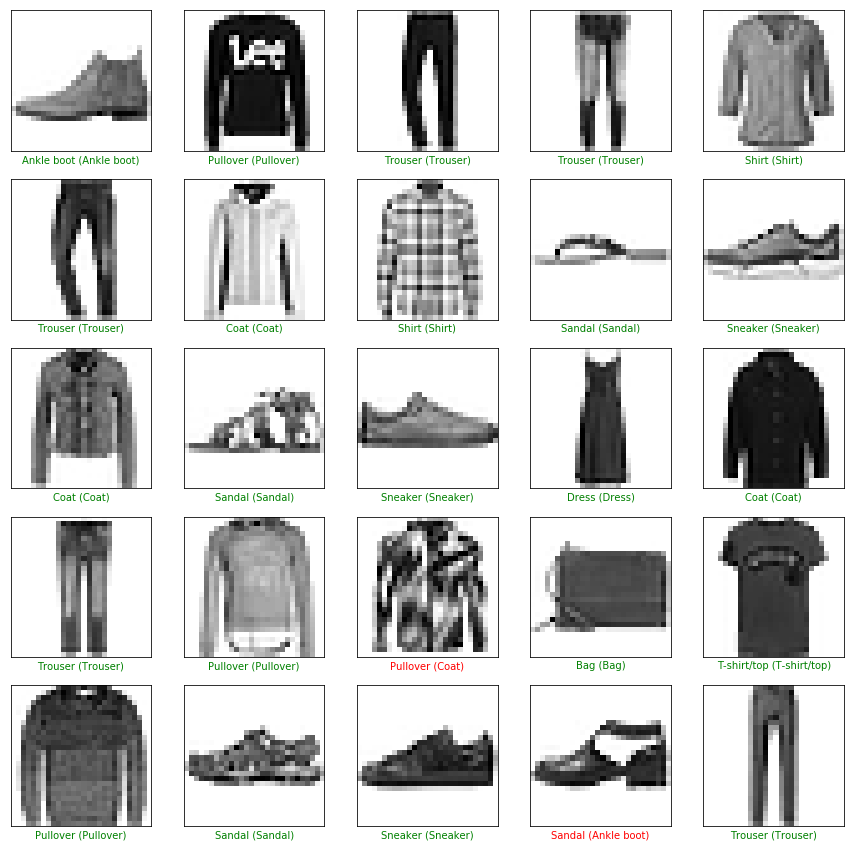

In [50]:
#plot first 25 test images, predicted labels and their tre labels
# color green is correct prediction and red is incorrect prediction

plt.figure(figsize = (15, 15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_labels = np.argmax(predictions[i])
    true_labels = test_labels[i]
    if predicted_labels == true_labels:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})". format(class_names[predicted_labels], class_names[true_labels]), color=color)
        

### got pretty good results

### finally use the trained model to make prediction about a single image

In [51]:
#grab an image from test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [53]:
#now add an initial dimension 
#that means add the image to a batch where it's the only member

img = np.expand_dims(img,0)
print(img.shape)

(1, 28, 28)


In [55]:
#now predict the image
predictions_single = model.predict(img)
print(predictions_single)

[[3.0027159e-06 2.1027655e-09 4.6721109e-08 6.0429413e-09 3.5938746e-07
  3.4403813e-03 3.9477089e-07 1.2925081e-02 2.8083682e-06 9.8362792e-01]]


### model.predict returns a list of lists, one for each image in the batch of data
### let's grab the predictions for our image in the batch

In [58]:
prediction_single = predictions_single[0]
np.argmax(prediction_single)

9

## AS we seen like as the previous model, it also predicts a label of 9 for the first image